## Exercícios - JADER GOMES

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

3 - Após a questão 2, você aplicou o algoritmo com K apropriado. Refaça o cálculo das métricas de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.







## Ex. 1

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt


In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
y = iris.target

In [6]:
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
5    5.4  3.9  1.7  0.4
6    4.6  3.4  1.4  0.3
7    5.0  3.4  1.5  0.2
8    4.4  2.9  1.4  0.2
9    4.9  3.1  1.5  0.1
10   5.4  3.7  1.5  0.2
11   4.8  3.4  1.6  0.2
12   4.8  3.0  1.4  0.1
13   4.3  3.0  1.1  0.1
14   5.8  4.0  1.2  0.2
15   5.7  4.4  1.5  0.4
16   5.4  3.9  1.3  0.4
17   5.1  3.5  1.4  0.3
18   5.7  3.8  1.7  0.3
19   5.1  3.8  1.5  0.3
20   5.4  3.4  1.7  0.2
21   5.1  3.7  1.5  0.4
22   4.6  3.6  1.0  0.2
23   5.1  3.3  1.7  0.5
24   4.8  3.4  1.9  0.2
25   5.0  3.0  1.6  0.2
26   5.0  3.4  1.6  0.4
27   5.2  3.5  1.5  0.2
28   5.2  3.4  1.4  0.2
29   4.7  3.2  1.6  0.2
..   ...  ...  ...  ...
120  6.9  3.2  5.7  2.3
121  5.6  2.8  4.9  2.0
122  7.7  2.8  6.7  2.0
123  6.3  2.7  4.9  1.8
124  6.7  3.3  5.7  2.1
125  7.2  3.2  6.0  1.8
126  6.2  2.8  4.8  1.8
127  6.1  3.0  4.9  1.8
128  6.4  2.8  5.6  2.1
129  7.2  3.0  5

In [4]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#Normalizando
normal = normalize(df)/2
df = pd.DataFrame(normal)

In [9]:
print(df)

            0         1         2         3
0    0.401886  0.275804  0.110322  0.015760
1    0.414066  0.253510  0.118305  0.016901
2    0.402667  0.274156  0.111376  0.017135
3    0.400015  0.269575  0.130440  0.017392
4    0.395482  0.284747  0.110735  0.015819
5    0.392087  0.283174  0.123435  0.029044
6    0.390055  0.288301  0.118712  0.025438
7    0.401092  0.272743  0.120328  0.016044
8    0.403212  0.265753  0.128295  0.018328
9    0.409016  0.258765  0.125209  0.008347
10   0.401868  0.275354  0.111630  0.014884
11   0.393496  0.278726  0.131165  0.016396
12   0.411536  0.257210  0.120031  0.008574
13   0.401256  0.279946  0.102647  0.009332
14   0.405604  0.279727  0.083918  0.013986
15   0.386906  0.298664  0.101817  0.027151
16   0.397145  0.286827  0.095609  0.029418
17   0.401637  0.275633  0.110253  0.023626
18   0.403414  0.268943  0.120316  0.021232
19   0.389824  0.290457  0.114654  0.022931
20   0.408669  0.257310  0.128655  0.015136
21   0.392959  0.285088  0.11557

In [10]:
df.head()

,0,1,2,3
0,0.401886,0.275804,0.110322,0.015760
1,0.414066,0.253510,0.118305,0.016901
2,0.402667,0.274156,0.111376,0.017135
3,0.400015,0.269575,0.130440,0.017392
4,0.395482,0.284747,0.110735,0.015819


In [11]:
df_pca = PCA(n_components=2).fit_transform(df)

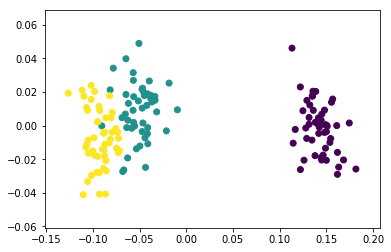

In [12]:
fig,ax = plt.subplots()
ax.scatter(df_pca[:,0], df_pca[:,1], c=y)
plt.show()

In [13]:
# clusterização usando KMeans 
km = KMeans(n_clusters=3)
km.fit(df_pca)
clusters = km.predict(df_pca)

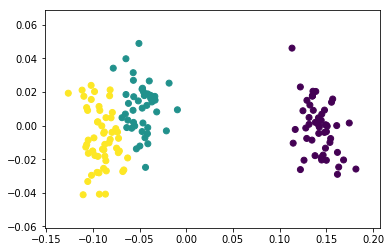

In [15]:
fig,ax = plt.subplots()
ax.scatter(df_pca[:,0], df_pca[:,1], c=clusters)
plt.show()

In [172]:
#avaliando os clusteres
score_homo = metrics.homogeneity_score(y,clusters)
score_comp = metrics.completeness_score(y,clusters) 

print('homogeneity = {0}'.format(score_homo))
print('completeness = {0}'.format(score_comp))

homogeneity = 0.8983263672602775
completeness = 0.9010648908640206


## Ex. 2

In [16]:
clusters_result = []
for i in range(9):
    km = KMeans(n_clusters=i+1)
    km.fit(df_pca)   
    clusters_result.append(km.inertia_)

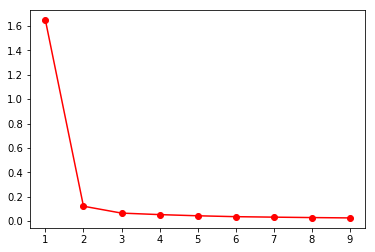

In [17]:
plt.figure()
plt.plot(np.arange(1,10),clusters_result,'ro-')
plt.show()

In [18]:
# KMeans clustering
km = KMeans(n_clusters=2)
km.fit(df_pca)
clusters = km.predict(df_pca)

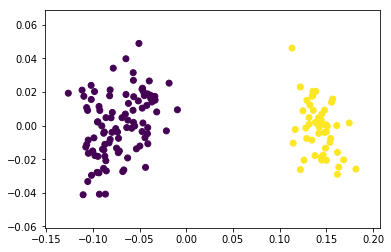

In [19]:
fig,ax = plt.subplots()
ax.scatter(df_pca[:,0], df_pca[:,1], c=clusters)
plt.show()

## Ex. 3

In [20]:
#avaliando os clusteres
score_homo = metrics.homogeneity_score(y,clusters)
score_comp = metrics.completeness_score(y,clusters) 

print('homogeneity = {0}'.format(score_homo))
print('completeness = {0}'.format(score_comp))

homogeneity = 0.5793801642856945
completeness = 0.9999999999999997
